In [1]:
import numpy as np
import pandas as pd

In [2]:
fname = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(fname)

In [3]:
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,13,18,19,23,27,28,36,39,43,44
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1,1,3,3,3,4,7,7,7,7
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,2,2
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,7,8,8,8,8,9,10,12,12,16


In [4]:
df = df.astype({'Province/State': str})

In [5]:
fname = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cases_df = pd.read_csv(fname)

In [6]:
cases_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,7,7,7,7,7,7,9,15,15,15
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,589,690,745,820,1054,1054,1133,1265,1451,1451
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,329,407,424,482,532,571,663,736,770,822
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,62,71,77,78,80,84,87,91,93,96
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580


In [7]:
cases_df = cases_df.astype({'Province/State': str})

### Function definitions

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [10]:
EPS = 1e-16

In [11]:
def double_exp(a, mu, c, x):
    # x: numpy.array
    # a, mu, c > 0
    return c * np.exp(-mu * np.exp(-a * x)) 

In [12]:
def der_double_exp(a, mu, c, x):
    return a * mu * double_exp(a, mu, c, x) * np.exp(-a * x) 

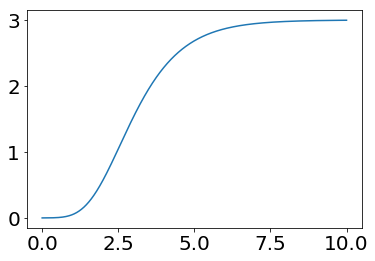

In [13]:
xx = np.linspace(0, 10, 1000)
ff = double_exp(0.9, 10.0, 3.0, xx)
plot(xx, ff)

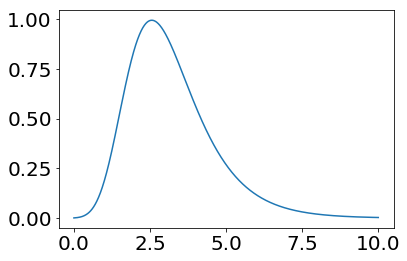

In [14]:
plot(xx, der_double_exp(0.9, 10.0, 3.0, xx))

In [15]:
from collections import namedtuple
from scipy.optimize import curve_fit

def fit_double_exp(xdata, ydata, p0=None, method='dogbox', **kwargs):
    def func(x, a, mu, c):
        return double_exp(a, mu, c, x)
    
    popt, pcov = curve_fit(func, xdata, ydata, p0=p0, method=method, bounds=(0, np.inf), **kwargs)
    return namedtuple('popt', ['a', 'mu', 'c'])(a=popt[0], mu=popt[1], c=popt[2])

In [134]:
from scipy.stats import linregress

def create_plots(ar, rows=4, cols=3, sz=20, text='', k=7, m=30, winsize=5, threshold=10, **kwargs):
    df = ar.iloc[0, 4:].astype(float)
    df = df[df > 0]
    dd = df.values
    f = figure()
    f.set_figheight(15)
    f.set_figwidth(25)
    f.suptitle(text, y=0.93, fontsize=20)
    
    subplot(rows, cols, 1)
    plot(dd)
    
    sm1 = df.transpose().rolling(winsize, center=True).mean()
    subplot(rows, cols, 2)
    plot(np.diff(sm1.values)) 
    ylabel('derivative of smoothed', fontsize=sz)    
    
    subplot(rows, cols, 3)
    plot(np.log(dd))
    ylabel('log', fontsize=sz)
        
    sm_log = np.log(df).transpose().rolling(winsize, center=True).mean().values
    subplot(rows, cols, 4)
    plot(sm_log) 
    ylabel('log smoothed', fontsize=sz)
    
    subplot(rows, cols, 5)
    plot(np.diff(sm_log))
    ylabel('derivative log', fontsize=sz)
        
    subplot(rows, cols, 6)
    sm2 = sm1.diff().rolling(winsize, center=True).mean()
    plot(sm2.diff().values) 
    ylabel('second derivative smoothed', fontsize=sz)    
    
    subplot(rows, cols, 7)
    logderlog = np.log(np.maximum(np.diff(sm_log), EPS))
    plot(logderlog)
    ylabel('log derivative log', fontsize=sz)

    # Fit last k values with least squares
    x = np.arange(len(logderlog))
    ind = np.array([False if np.isnan(z) else z > -1e3 for z in logderlog])
    coeff, b, *_ = linregress(x[ind][-k:], logderlog[ind][-k:])
    a = -coeff
    plot(x[ind][-k:], -a * x[ind][-k:] + b, 'r')
        
    if a < 1e-16:
        print("Exponential rate is increasing! (a = {}, b = {})".format(a, b))
    else:
        # Forecast
        n = len(dd)
        subplot(rows, cols, 8)
        mu = np.exp(b) / a
        
        c = 1 / np.linalg.norm(double_exp(a, mu, 1.0, np.arange(n)[-k:]))
        # Normalize data, otherwise curve_fit() does not converge
        norm_dd = np.linalg.norm(dd[-k:])
        opt_params = fit_double_exp(np.arange(n)[-k:], dd[-k:] / norm_dd, p0=[a, mu, c], method='dogbox', **kwargs) 
        plot(dd)
        fit = double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n)[-k:]) * norm_dd
        plot(np.arange(n)[-k:], fit)
        forecast = double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n, n+m)) * norm_dd
        plot(np.arange(n, n+m), forecast, label='forecast')
        legend(loc='best', fontsize=sz)

        # Forecast of derivative
        subplot(rows, cols, 9)
        plot(np.diff(sm1.values))
        der_fit = der_double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n)[-k:]) * norm_dd
        plot(np.arange(n)[-k:], der_fit)
        der_forecast = der_double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n, n+m)) * norm_dd
        plot(np.arange(n, n+m), der_forecast, label='forecast\n(derivative)')
        legend(loc='best', fontsize=sz)
        
        # Find peak
        lr = der_double_exp(opt_params.a, opt_params.mu, opt_params.c, np.arange(n+300)) * norm_dd
        peak_day = np.argmax(lr)
        print("Peak in {} days".format(peak_day - n))
        ind = np.nonzero(lr < threshold)[0]
        if np.any(ind >= n):
            end_day = ind[ind >= n].min()
            print("< {} new in {} days".format(threshold, end_day - n))
        tot = double_exp(opt_params.a, opt_params.mu, opt_params.c, n+300) * norm_dd
        print("Total number = {}".format(np.round(tot).astype(int)))

    pos = 10 if a >= 1e-16 else 8
    subplot(rows, cols, pos)
    plot(np.diff(dd) / dd[1:])
    if a >= 1e-16:
        plot(np.arange(n)[-k:], der_fit / fit)
    ylabel("derivative / fn", fontsize=sz)

### Plots

In [17]:
it = df[df['Country/Region'] == 'Italy']
itc = cases_df[cases_df['Country/Region'] == 'Italy']

In [18]:
it

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
137,nan,Italy,43.0,12.0,0,0,0,0,0,0,...,9134,10023,10779,11591,12428,13155,13915,14681,15362,15887


In [19]:
itc

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
137,nan,Italy,43.0,12.0,0,0,0,0,0,0,...,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948


Peak in -9 days
< 10 new in 57 days
Total number = 26733


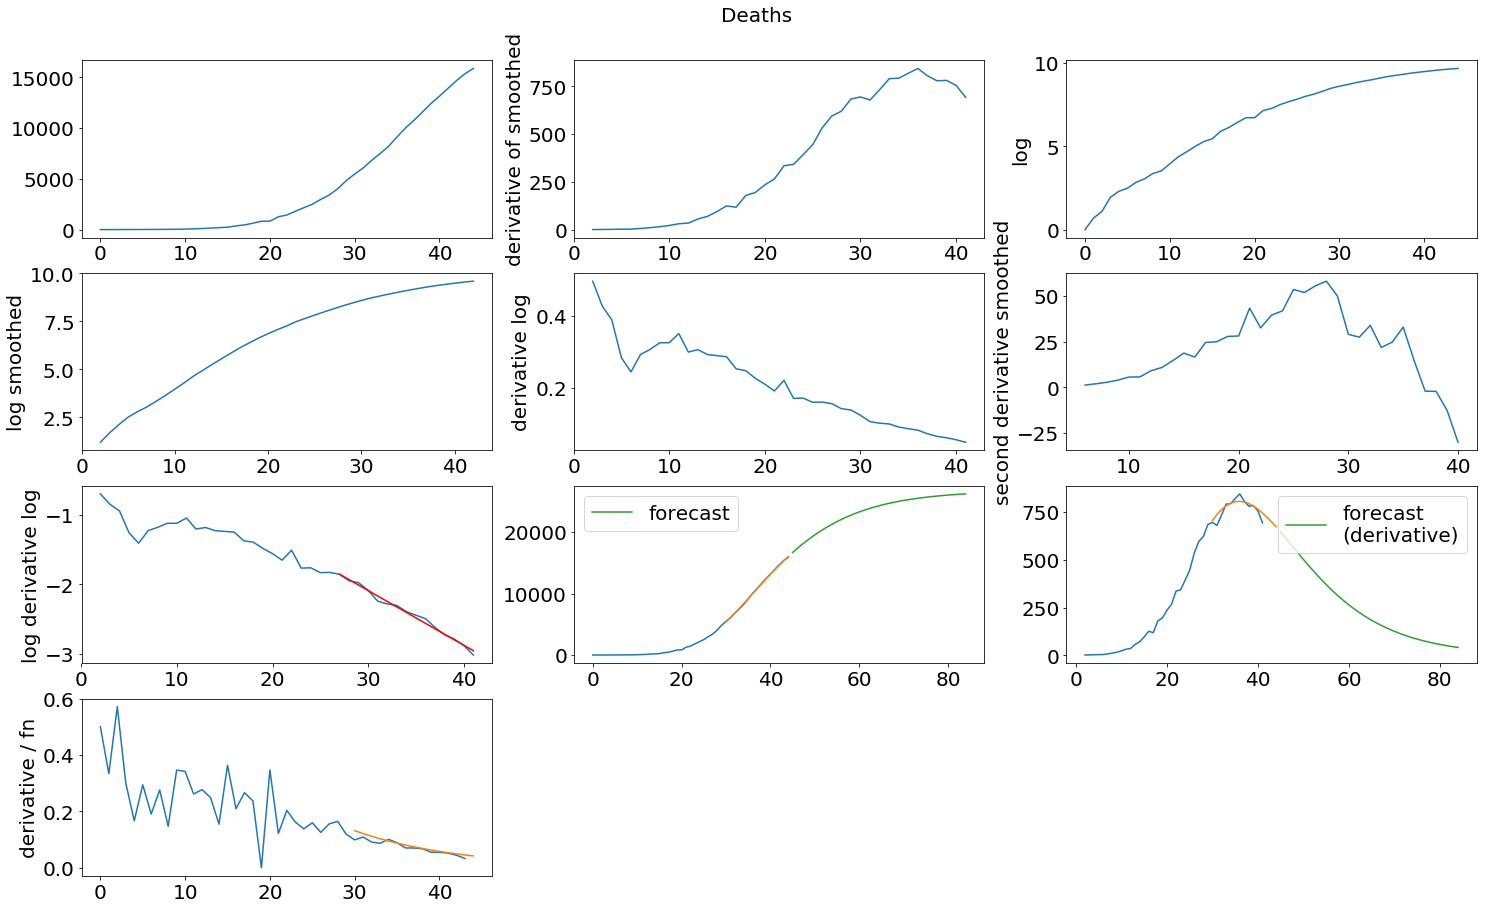

In [135]:
create_plots(it, text='Deaths', k=15, m=40, threshold=10)

Peak in -13 days
< 100 new in 50 days
Total number = 187085


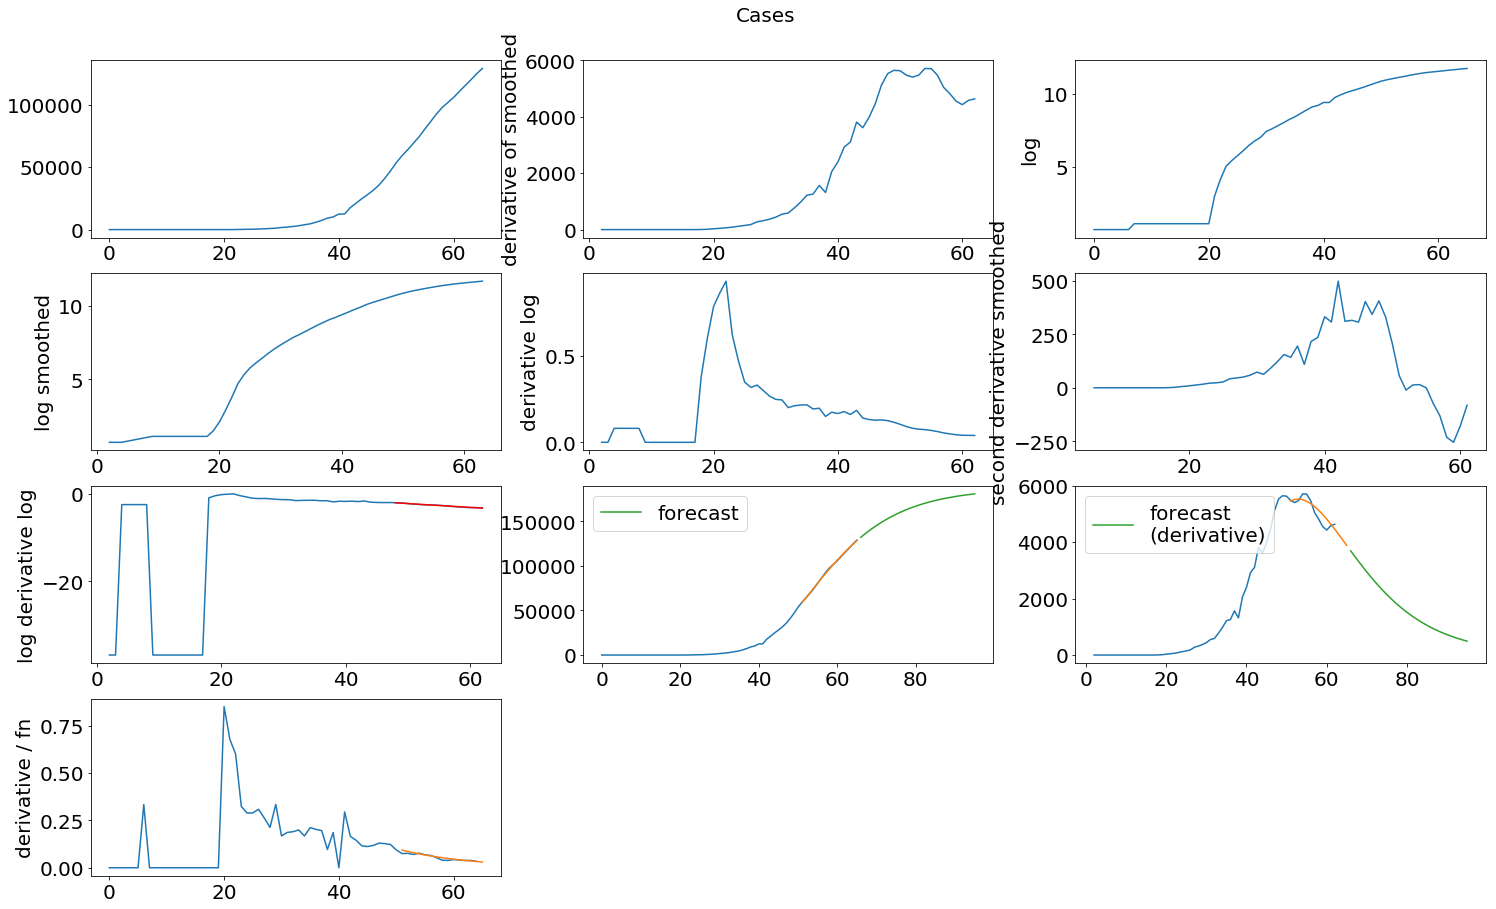

In [136]:
create_plots(itc, text='Cases', k=15, threshold=100)

In [137]:
hu = df[df['Province/State'] == 'Hubei']
huc = cases_df[cases_df['Province/State'] == 'Hubei']

Peak in -61 days
< 10 new in 0 days
Total number = 3232


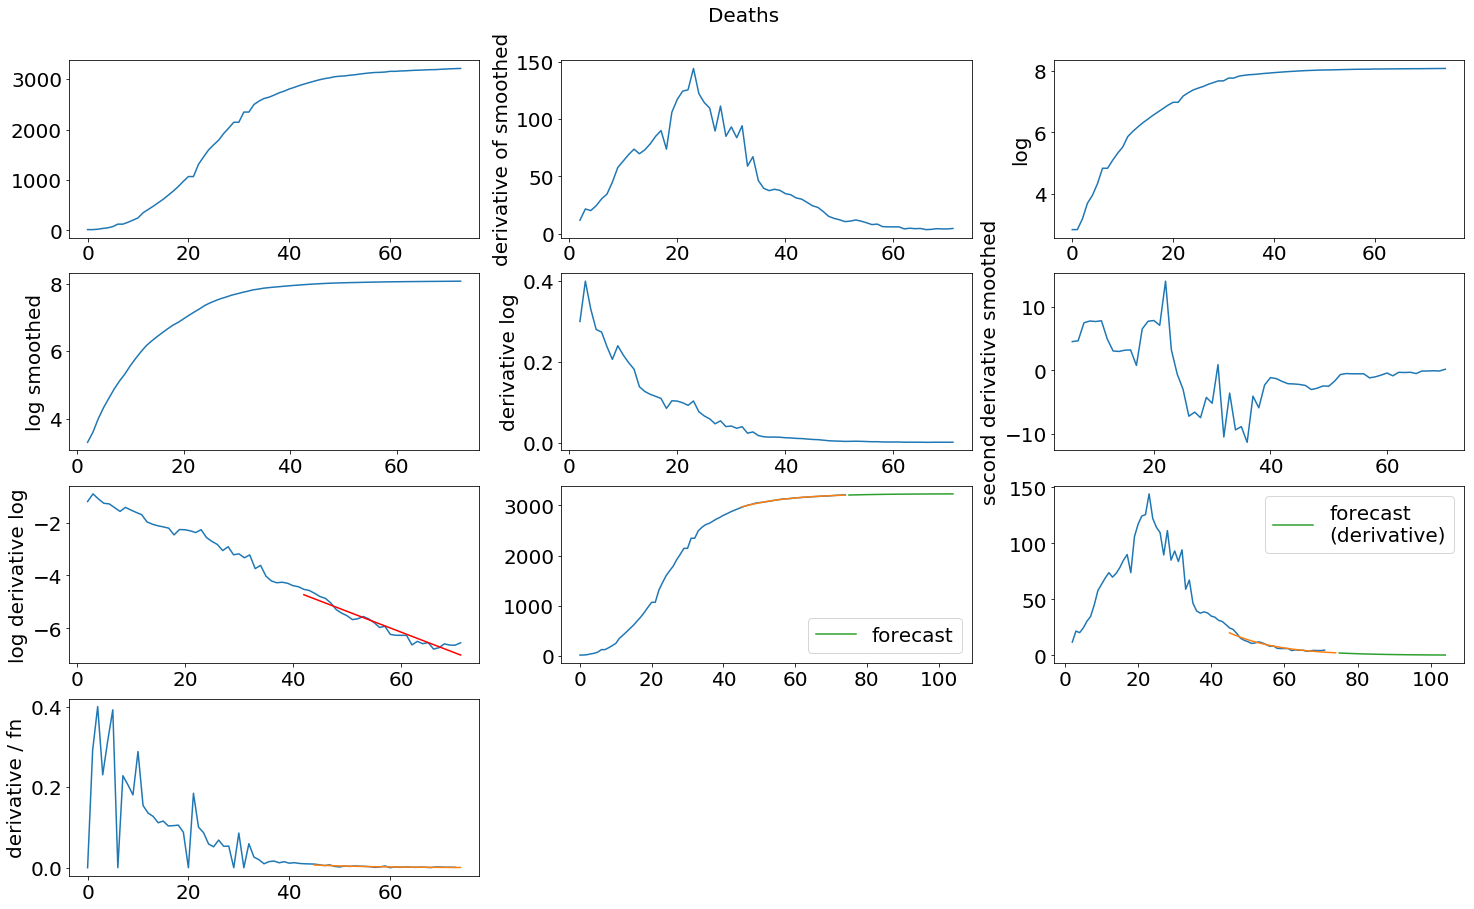

In [138]:
create_plots(hu, text='Deaths', k=30)

Peak in -46 days
< 100 new in 0 days
Total number = 67801


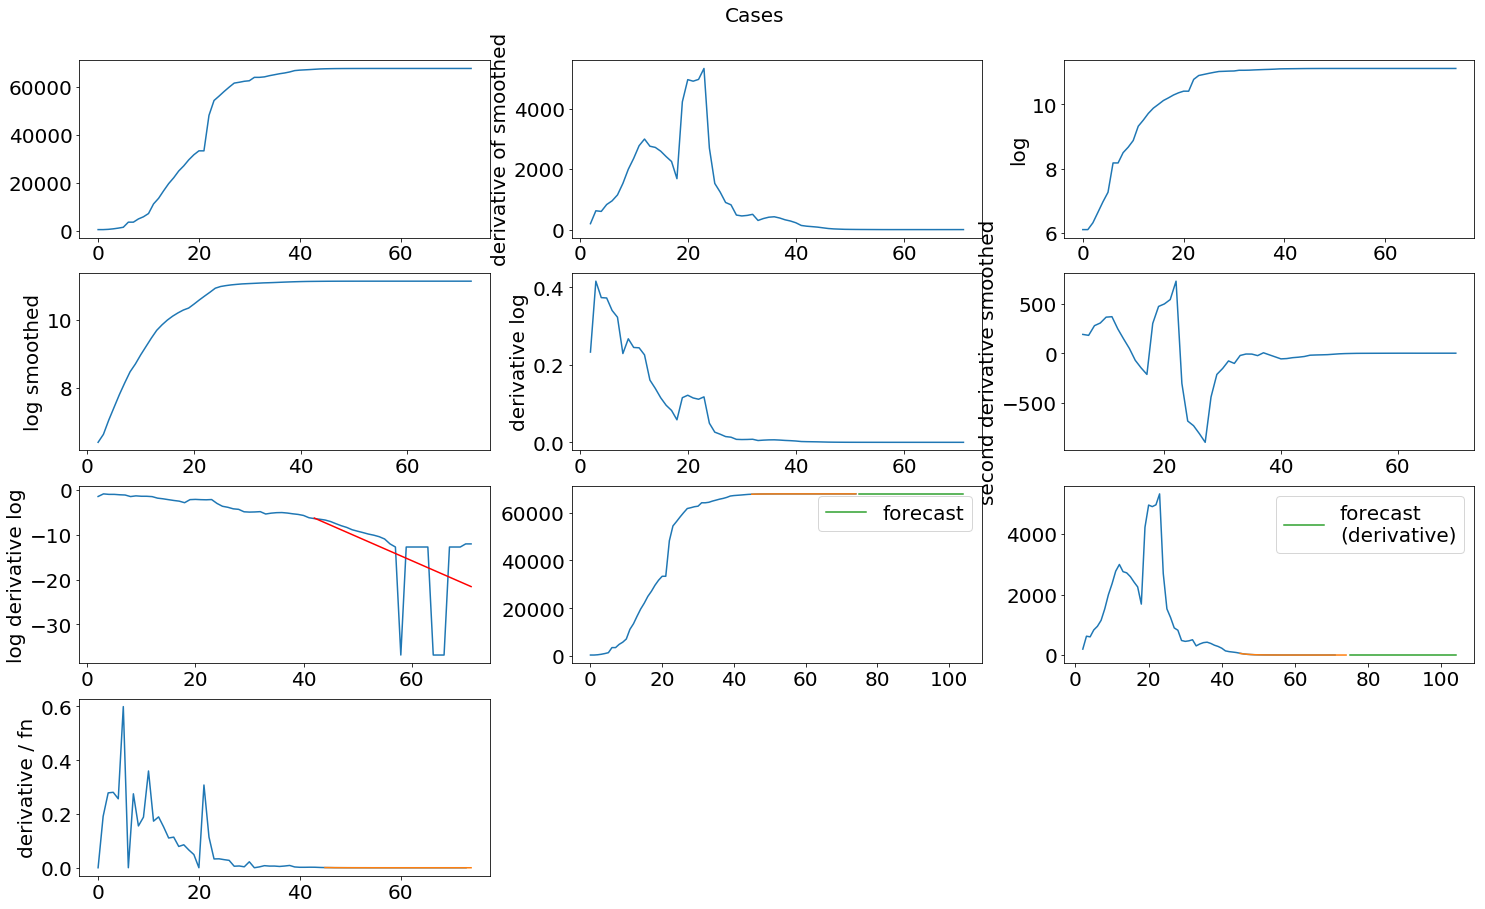

In [139]:
create_plots(huc, text='Cases', k=30, threshold=100)

In [140]:
uk = df[(df['Province/State'] == 'nan') & (df['Country/Region'] == 'United Kingdom')]

In [141]:
uk

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
223,nan,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,759,1019,1228,1408,1789,2352,2921,3605,4313,4934


In [142]:
ukc = cases_df[(cases_df['Province/State'] == 'nan') & (cases_df['Country/Region'] == 'United Kingdom')]

In [143]:
ukc

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
223,nan,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,14543,17089,19522,22141,25150,29474,33718,38168,41903,47806


Peak in 0 days
< 10 new in 41 days
Total number = 14821


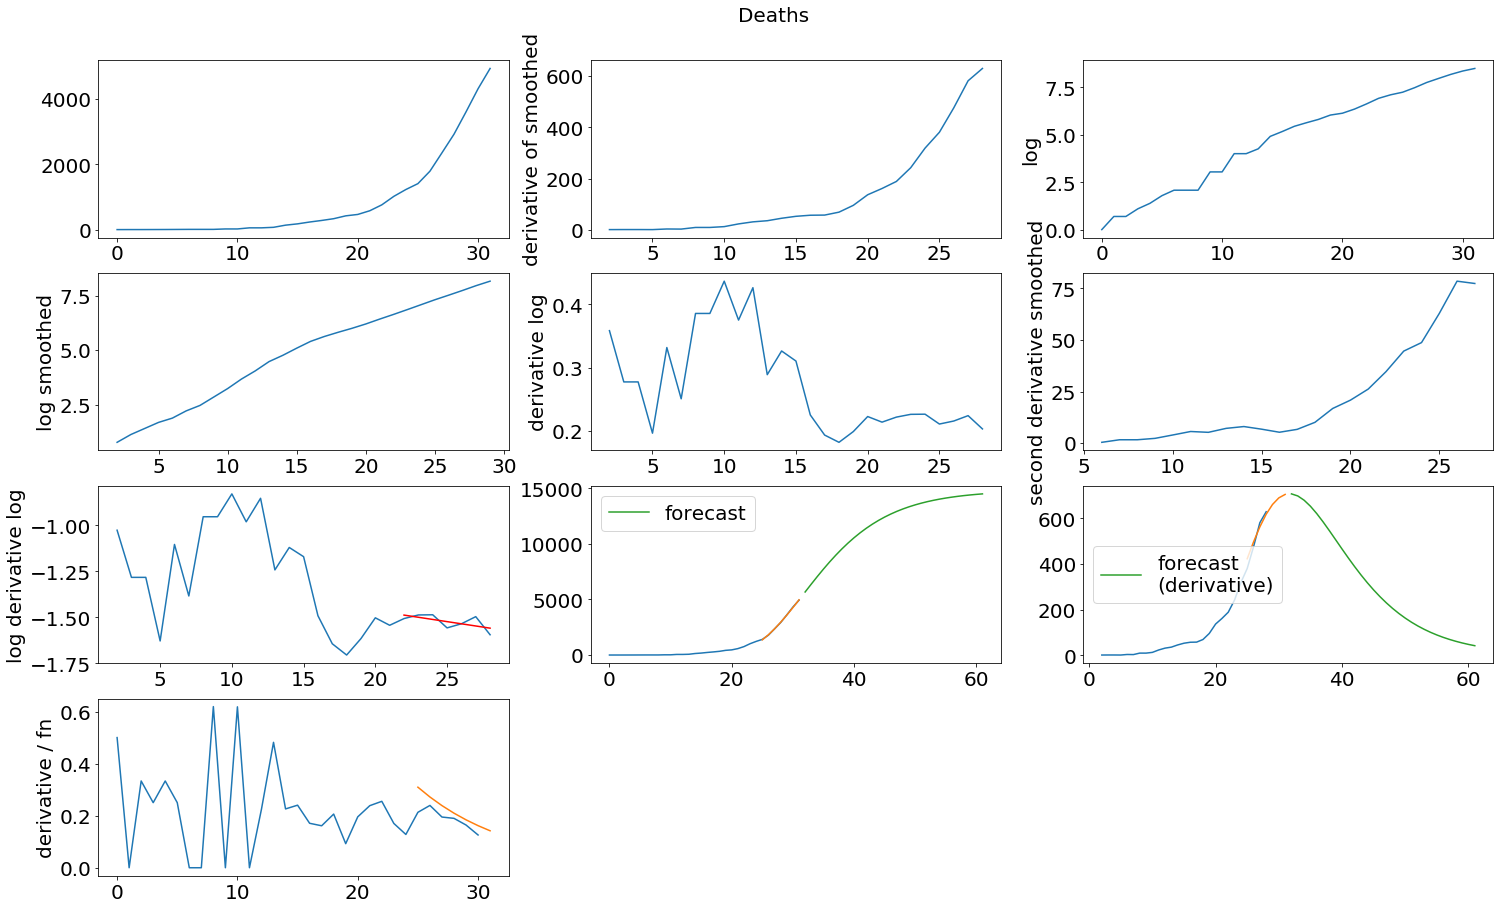

In [144]:
create_plots(uk, text='Deaths', k=7, max_nfev=1000)

Peak in 9 days
< 100 new in 95 days
Total number = 285350


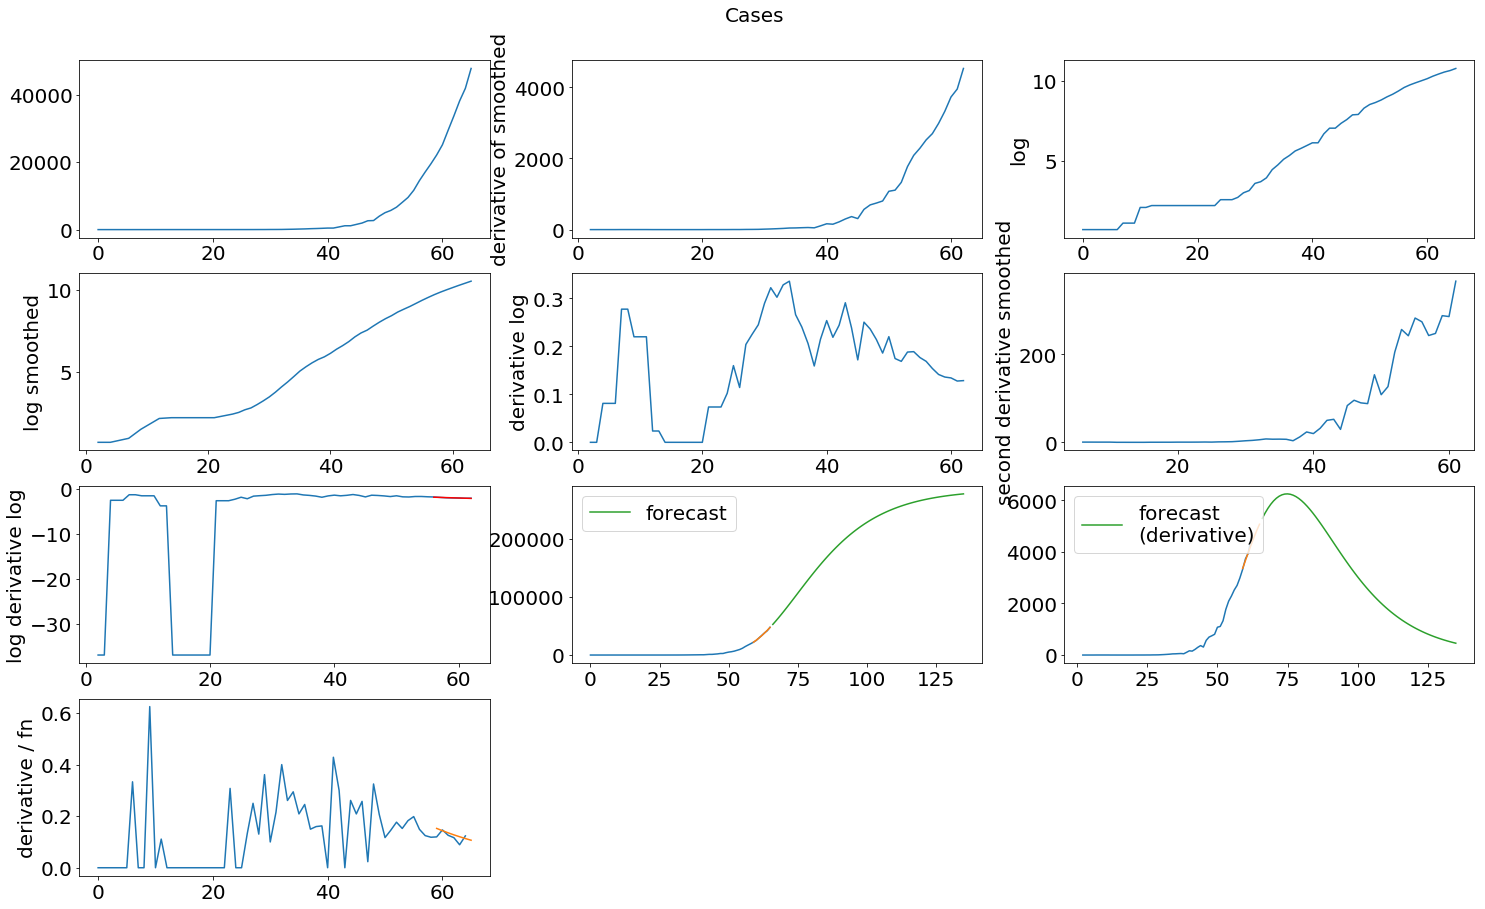

In [145]:
create_plots(ukc, text='Cases', k=7, m=70, threshold=100)

In [146]:
sp = df[df['Country/Region'] == 'Spain']
spc = cases_df[cases_df['Country/Region'] == 'Spain']

Peak in -7 days
< 10 new in 38 days
Total number = 20175


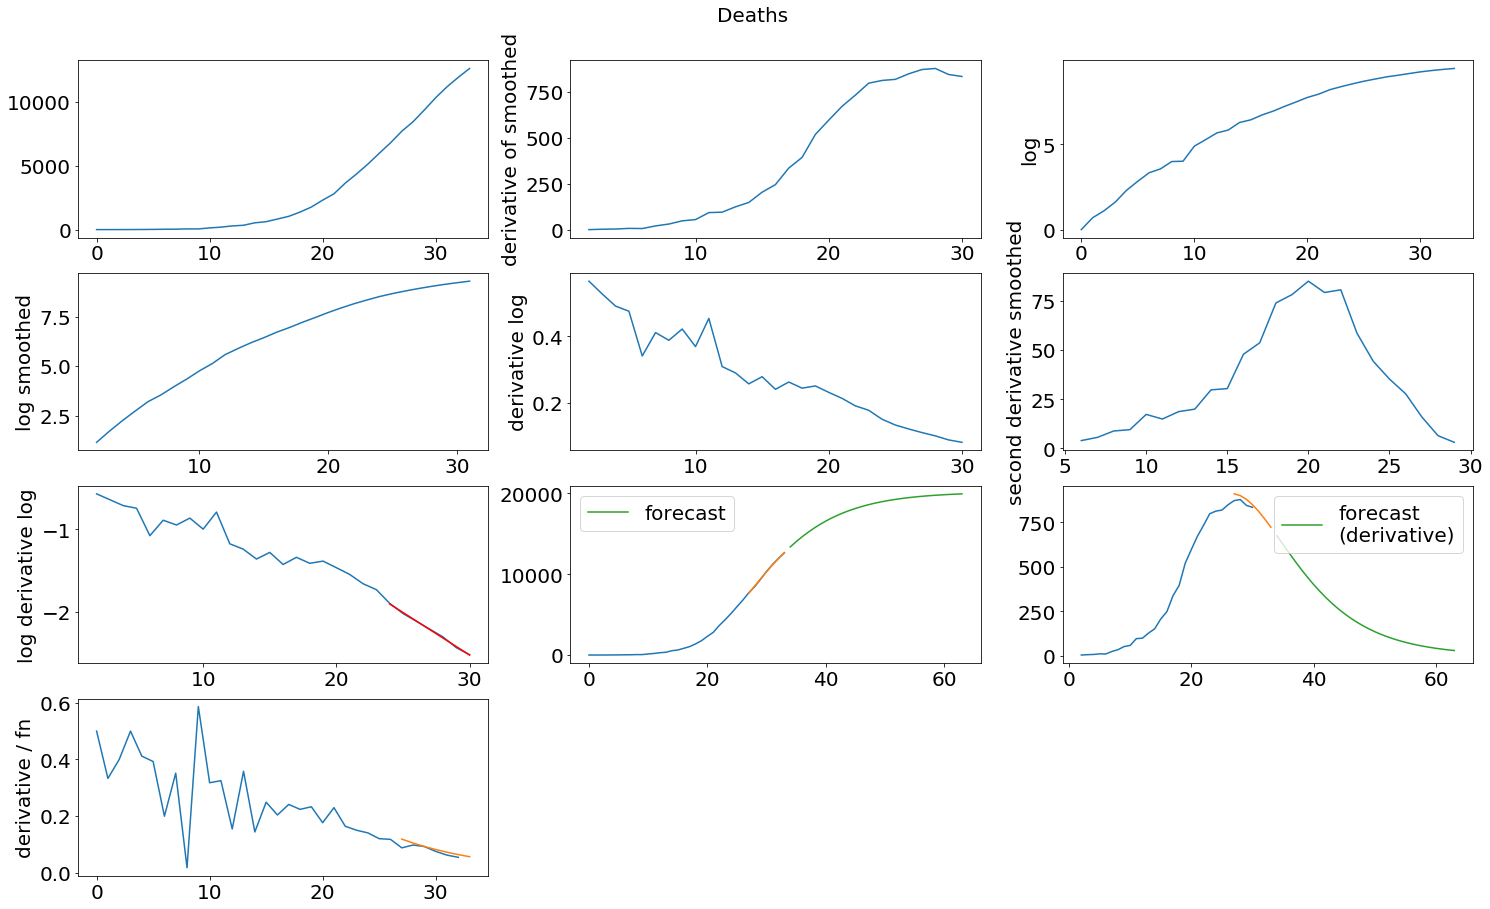

In [147]:
create_plots(sp, text='Deaths', k=7)

Peak in -9 days
< 100 new in 42 days
Total number = 205145


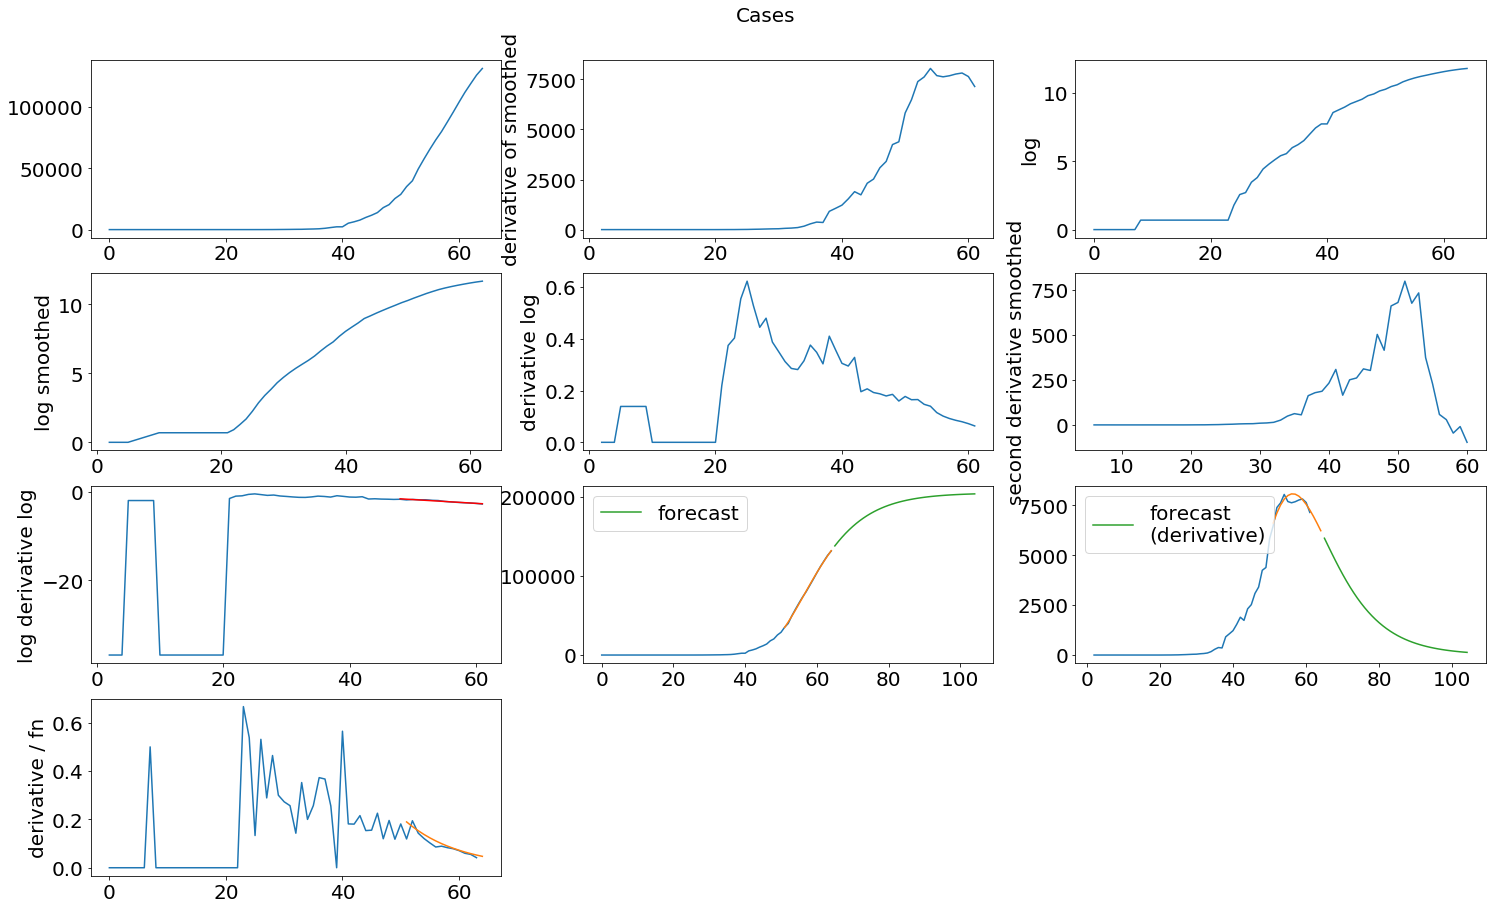

In [148]:
create_plots(spc, text='Cases', k=14, m=40, threshold=100)

In [149]:
fr = df[(df['Province/State'] == 'nan') & (df['Country/Region'] == 'France')]
frc = cases_df[(cases_df['Province/State'] == 'nan') & (cases_df['Country/Region'] == 'France')]

Peak in 299 days
Total number = 5621520254457934848


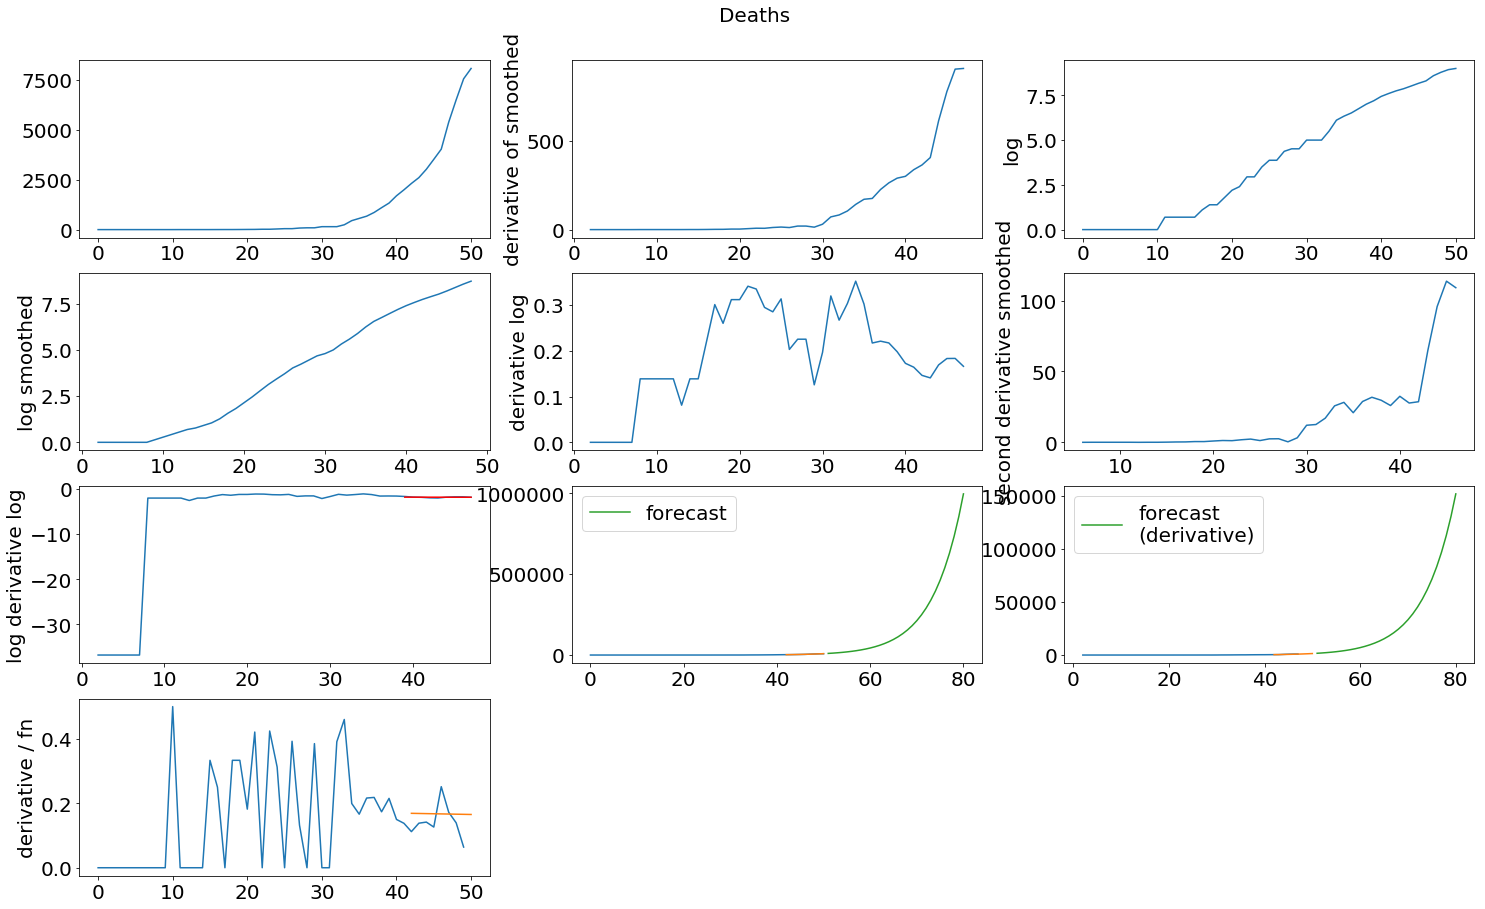

In [150]:
create_plots(fr, text='Deaths', k=9, max_nfev=1000)

Peak in 299 days
Total number = 2664625410011


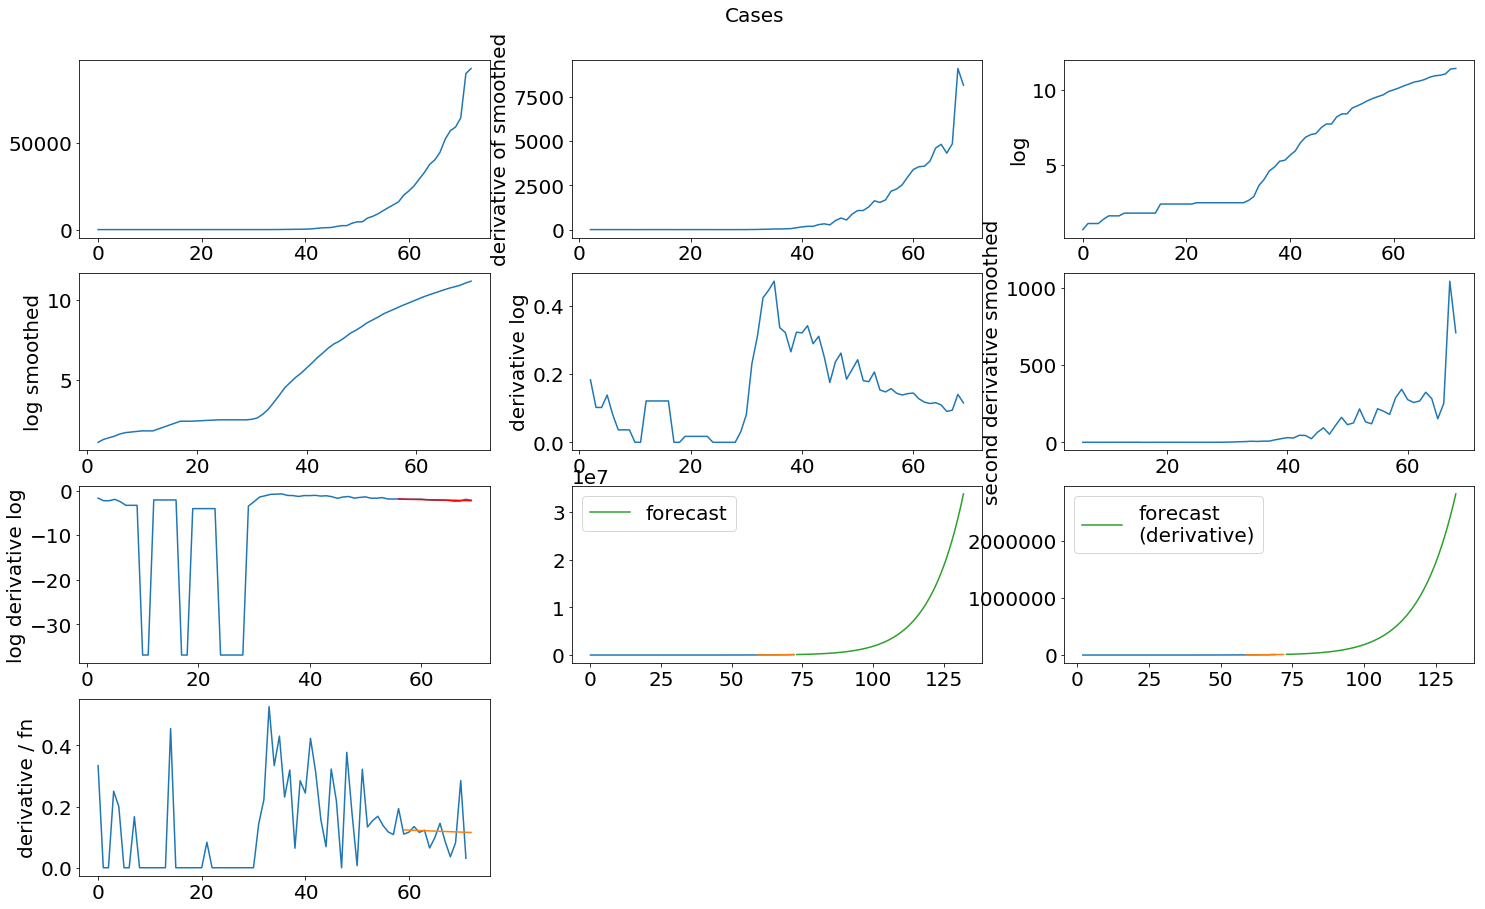

In [151]:
create_plots(frc, text='Cases', k=14, m=60, threshold=100, max_nfev=1000)

In [152]:
ger = df[df['Country/Region'] == 'Germany']
gerc = cases_df[cases_df['Country/Region'] == 'Germany']

Peak in -3 days
< 10 new in 25 days
Total number = 3323


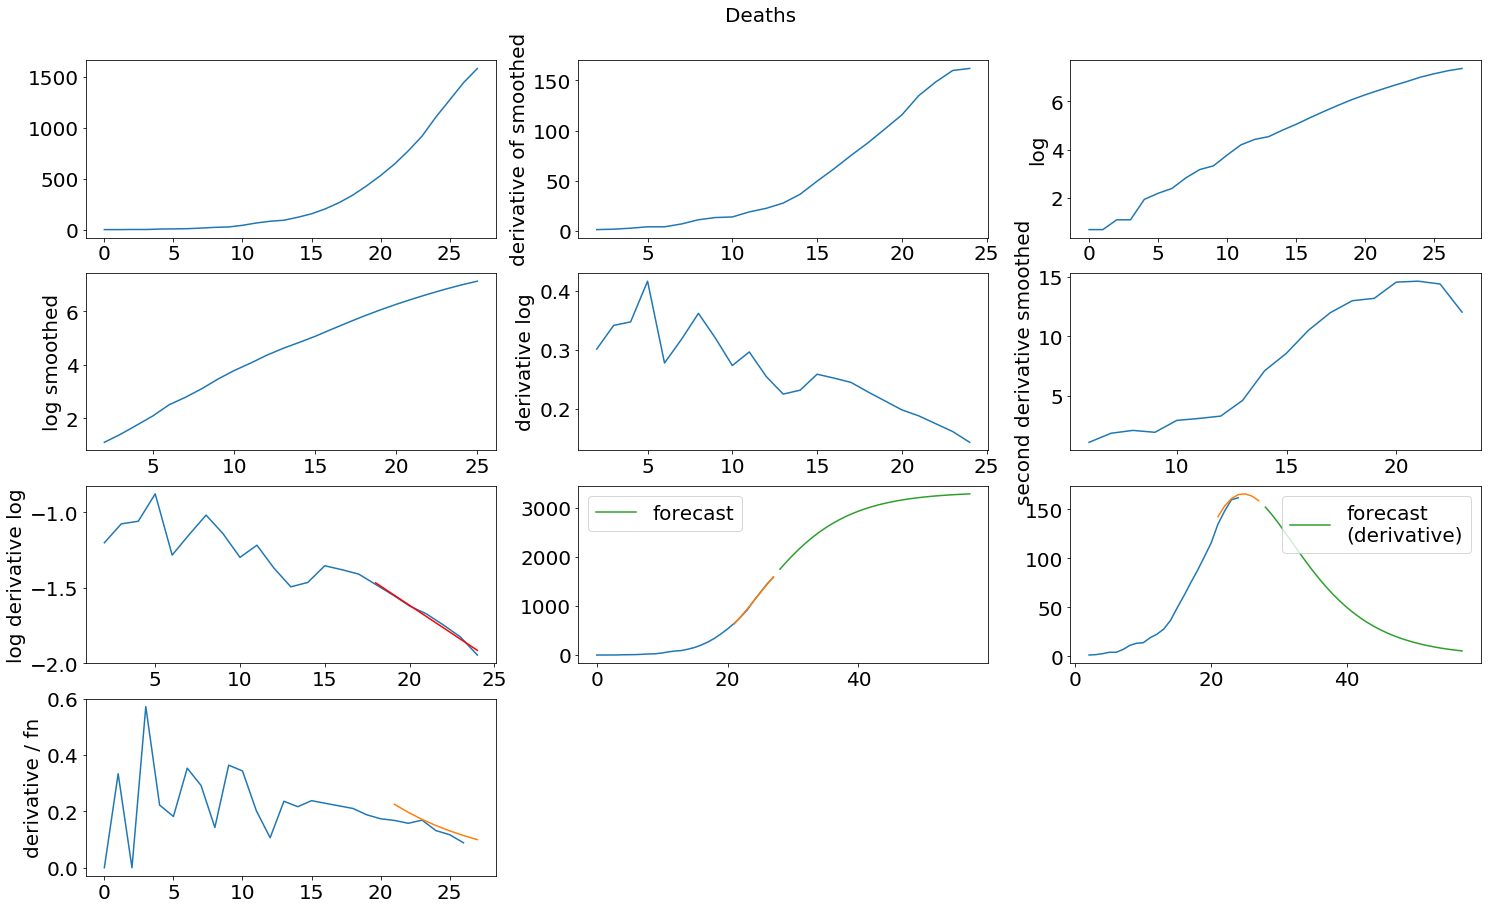

In [153]:
create_plots(ger, text='Deaths', k=7)

Peak in -8 days
< 100 new in 47 days
Total number = 170997


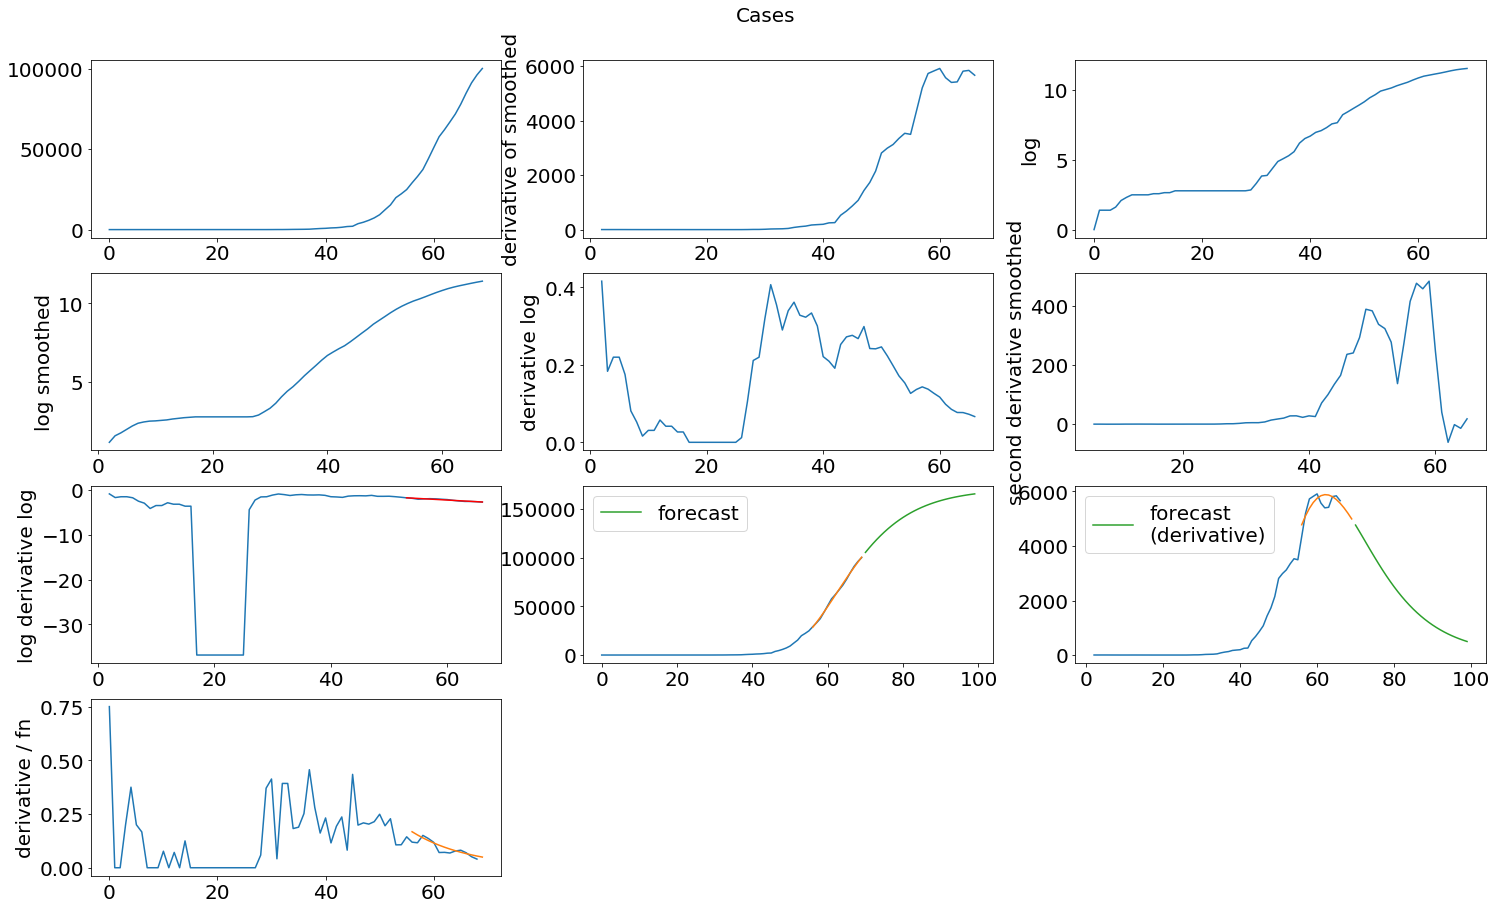

In [154]:
create_plots(gerc, text='Cases', k=14, threshold=100)

In [155]:
gr = df[df['Country/Region'] == 'Greece']
grc = cases_df[cases_df['Country/Region'] == 'Greece']

Peak in 9 days
< 5 new in 27 days
Total number = 368


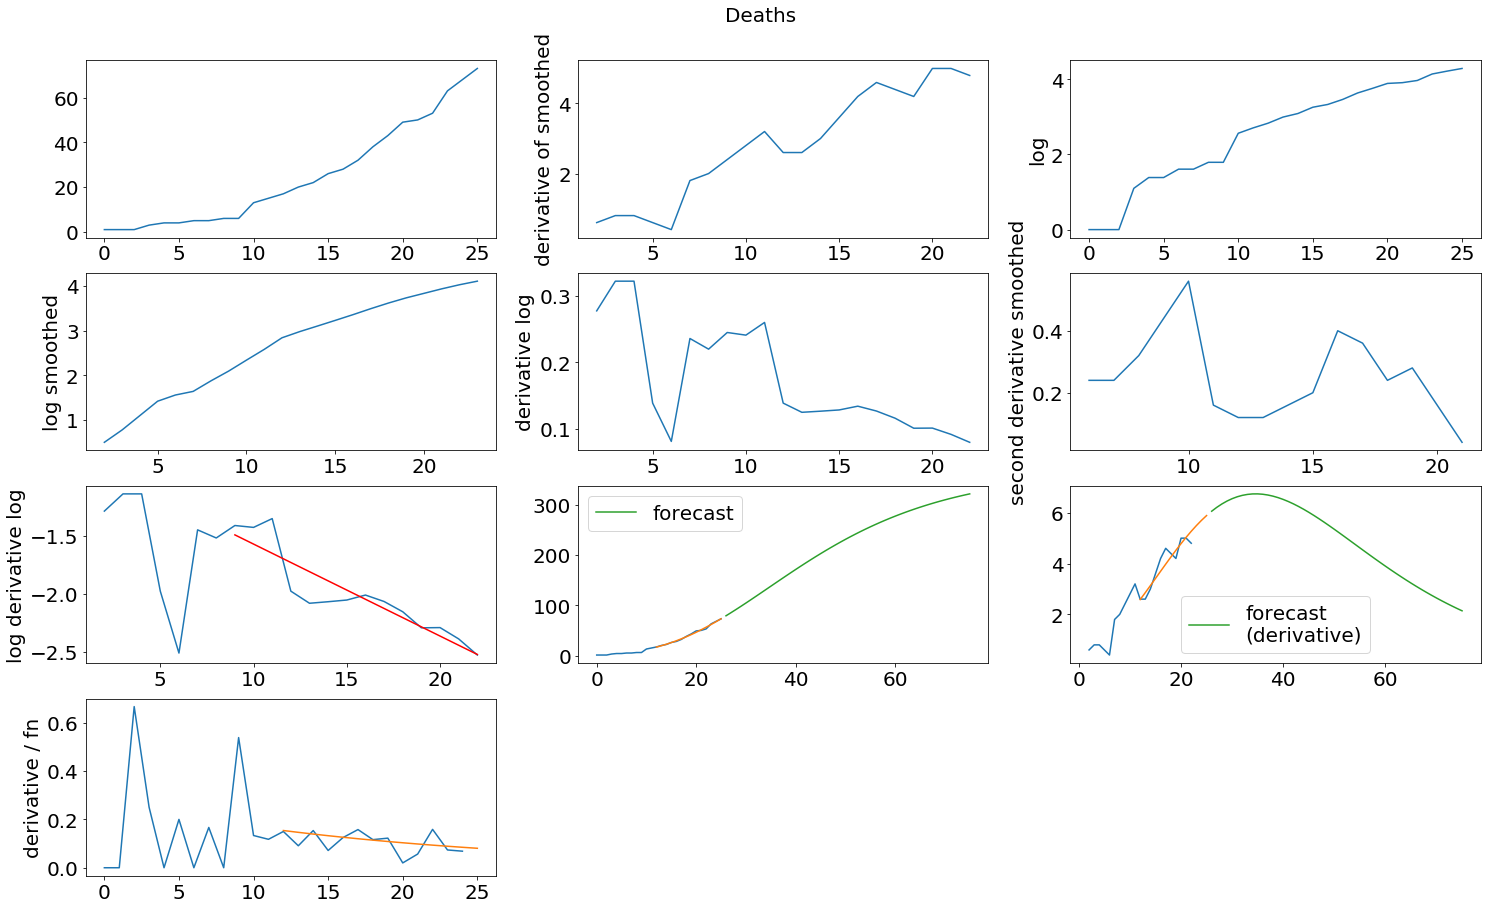

In [156]:
create_plots(gr, text='Deaths', k=14, m=50, threshold=5)

Peak in -4 days
< 100 new in 0 days
Total number = 4102


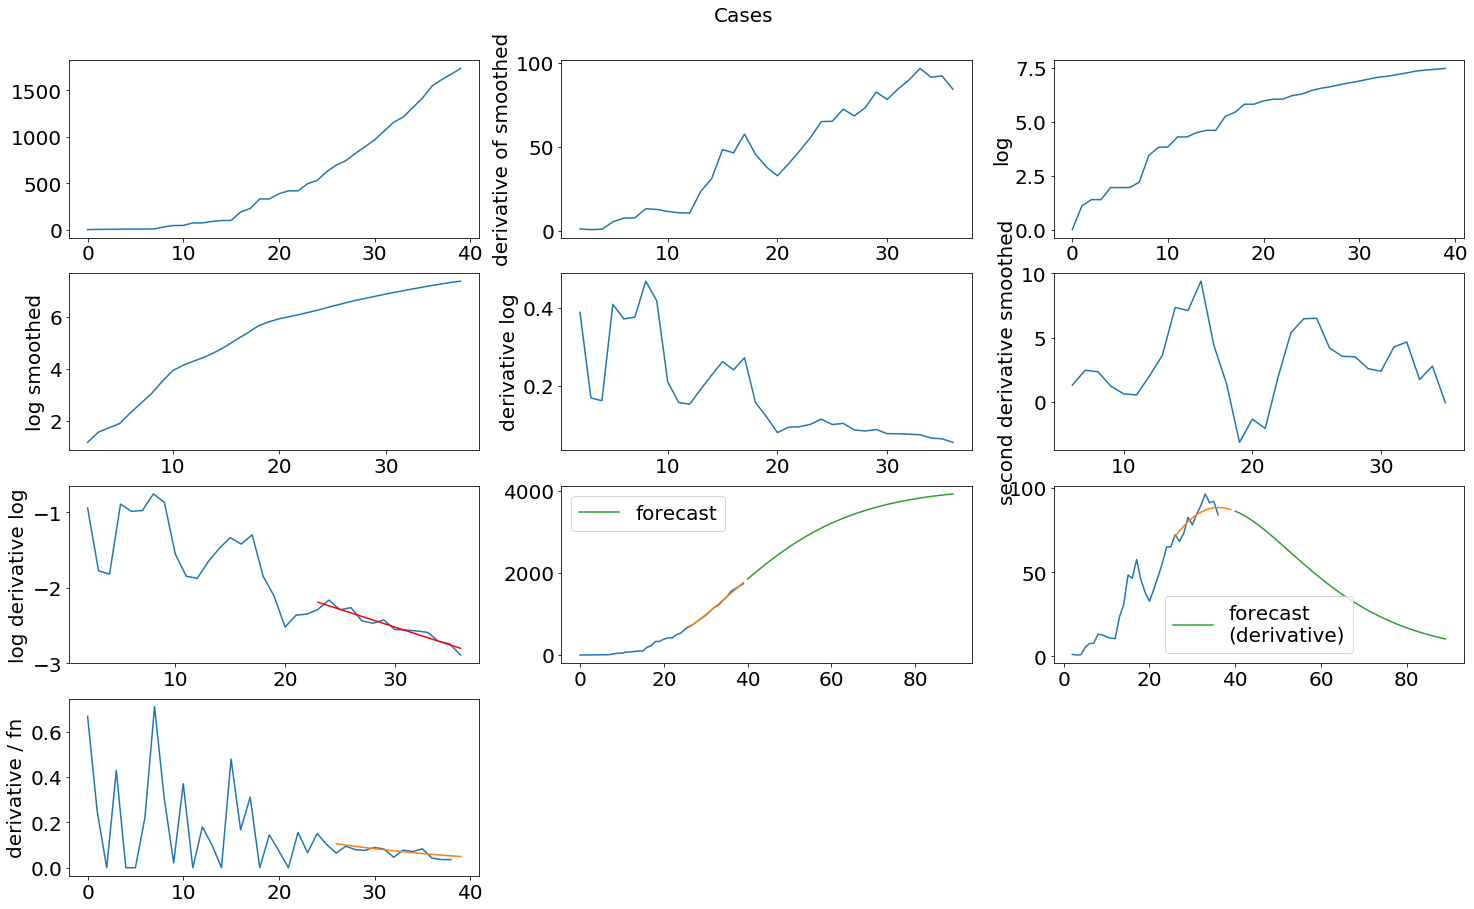

In [157]:
create_plots(grc, text='Cases', k=14, m=50, threshold=100)

In [158]:
sw = df[df['Country/Region'] == 'Sweden']
swc = cases_df[cases_df['Country/Region'] == 'Sweden']

Peak in 3 days
< 5 new in 44 days
Total number = 1754


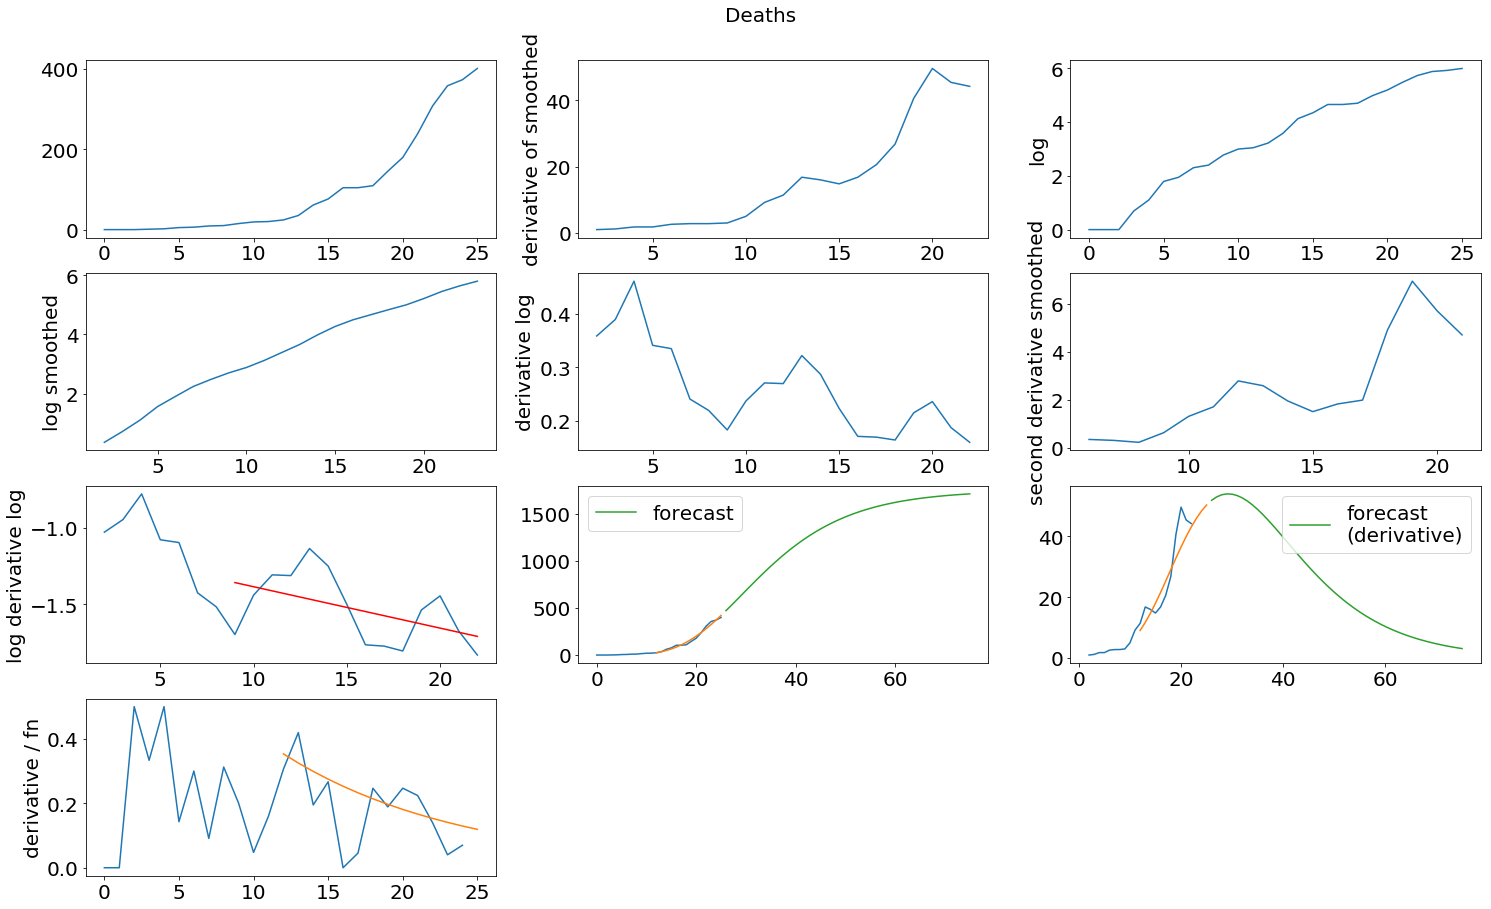

In [159]:
create_plots(sw, text='Deaths', k=14, m=50, threshold=5)

Exponential rate is increasing! (a = -0.0003589463820587884, b = -2.3852121153456474)


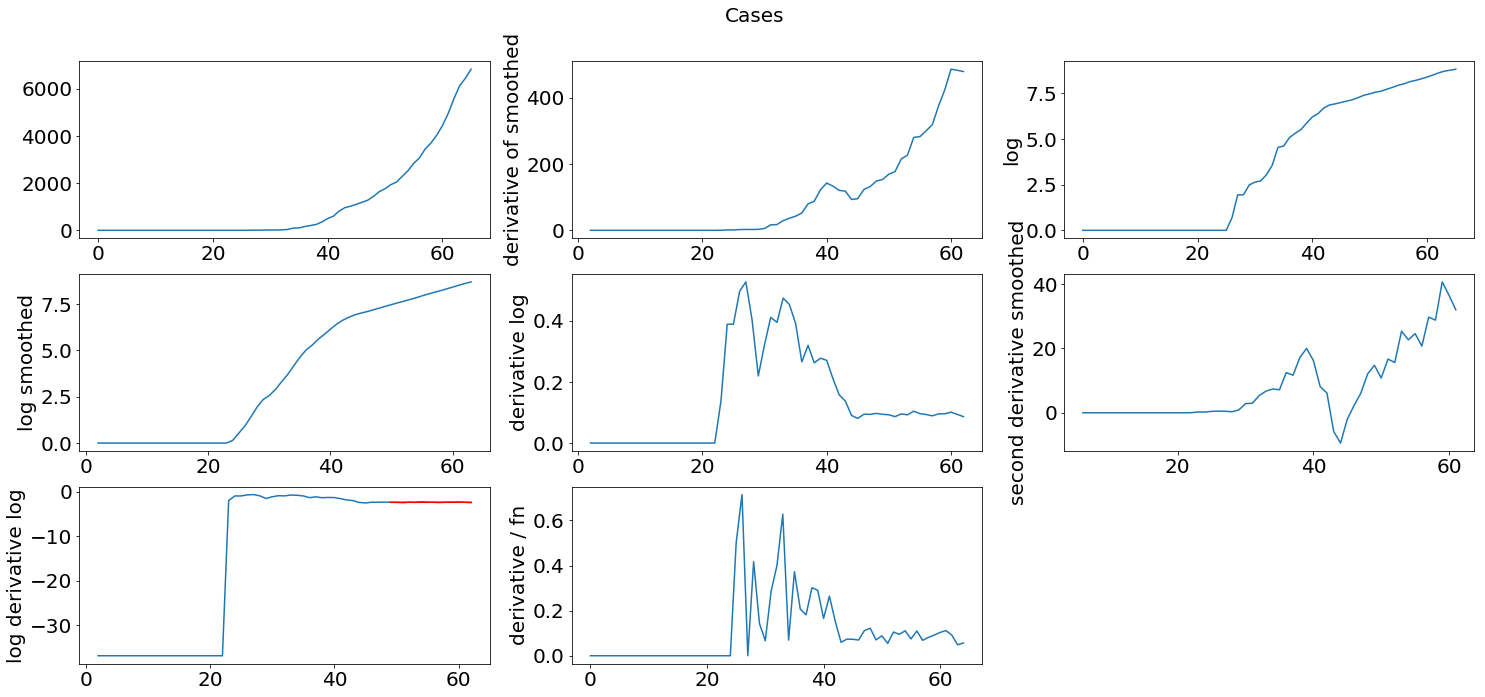

In [160]:
create_plots(swc, text='Cases', k=14, m=50, threshold=100)